In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the processed bulk dataset containing all relevant cell lines
bulk_all = pd.read_csv("../../data/processed/gdsc_final_cleaned.csv")

# Extract unique SANGER_MODEL_IDs used across your thesis
used_models = bulk_all["SANGER_MODEL_ID"].unique()

print(f"✅ {len(used_models)} unique cell lines found in processed_bulk.csv")


✅ 978 unique cell lines found in processed_bulk.csv


In [3]:
# Load the tissue info from Cell Model Passport
passport_df = pd.read_csv("../../data/original/model_tissue_list.csv")

# Extract and clean relevant columns
tissue_df = passport_df[["model_id", "tissue"]].dropna().drop_duplicates(subset="model_id")
tissue_df = tissue_df.rename(columns={"model_id": "SANGER_MODEL_ID", "tissue": "Tissue"})

# Filter to keep only models used in your thesis
filtered_tissue_df = tissue_df[tissue_df["SANGER_MODEL_ID"].isin(used_models)]

print(f"✅ Matched {filtered_tissue_df.shape[0]} cell lines with tissue information.")


✅ Matched 978 cell lines with tissue information.


/tmp/ipykernel_1375735/1048951287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tissue_counts.index, y=tissue_counts.values, palette="crest")


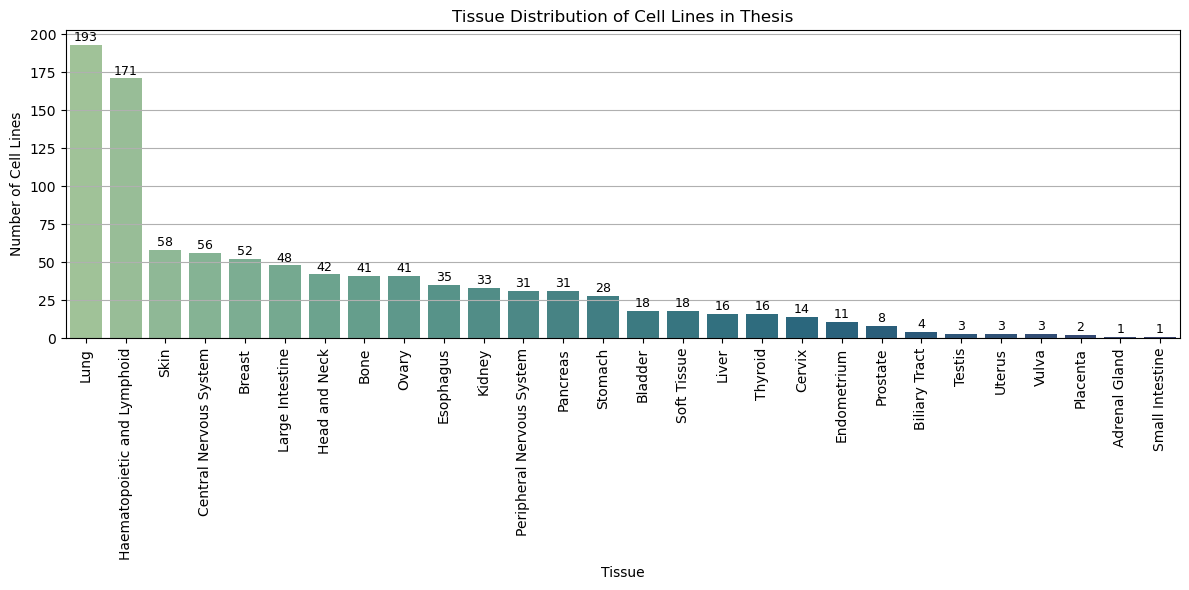

In [4]:
# Count tissue types
tissue_counts = filtered_tissue_df["Tissue"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tissue_counts.index, y=tissue_counts.values, palette="crest")
plt.xticks(rotation=90)
plt.title("Tissue Distribution of Cell Lines in Thesis")
plt.xlabel("Tissue")
plt.ylabel("Number of Cell Lines")
plt.grid(axis='y')
plt.tight_layout()

# Add count labels on top of bars
for i, count in enumerate(tissue_counts.values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)

plt.show()
